In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip "/content/drive/MyDrive/archive.zip"

Archive:  /content/drive/MyDrive/archive.zip
  inflating: Dataset/Dataset/test_set/forest/0.48007200_1530881924_final_forest.jpg  
  inflating: Dataset/Dataset/test_set/forest/0.64133000_1519374442_forest_deep.jpg  
  inflating: Dataset/Dataset/test_set/forest/0.72918000_1559733279_forests1_gettyimages_.jpg  
  inflating: Dataset/Dataset/test_set/forest/0.98884800_1554454572_spin.jpg  
  inflating: Dataset/Dataset/test_set/forest/01_NeilBurnell_Mystical_photoverticall.jpg  
  inflating: Dataset/Dataset/test_set/forest/091318_LH_forest_loss_main_FREE.jpg  
  inflating: Dataset/Dataset/test_set/forest/1009821.jpg  
  inflating: Dataset/Dataset/test_set/forest/111188170_river_in_the_mountain_forest.jpg  
  inflating: Dataset/Dataset/test_set/forest/1170x500_Ireland_web.jpg  
  inflating: Dataset/Dataset/test_set/forest/1200px_Mountainarea.jpg  
  inflating: Dataset/Dataset/test_set/forest/146019.jpg  
  inflating: Dataset/Dataset/test_set/forest/1506697583544.jpg  
  inflating: Dataset/Da

In [3]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/drive/MyDrive/train_set",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory("/content/drive/MyDrive/test_set",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 436 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [6]:
test_dataset.class_indices

{'forest': 0, 'with fire': 1}

In [7]:
#To define Linear initialisation import Sequential
from keras.models import Sequential
#To add layers import Dense
from keras.layers import Dense
#To create Convolution kernel import Convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [8]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [9]:
model.add(Dense(150,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [12]:
r = model.fit(train_dataset,epochs = 10,validation_data = test_dataset)

Epoch 1/10
14/14 [==============================] - 49s 3s/step - loss: 0.6947 - accuracy: 0.7317 - val_loss: 0.8065 - val_accuracy: 0.6364
Epoch 2/10
14/14 [==============================] - 41s 3s/step - loss: 0.7160 - accuracy: 0.6560 - val_loss: 0.7093 - val_accuracy: 0.6364
Epoch 3/10
14/14 [==============================] - 38s 3s/step - loss: 0.6568 - accuracy: 0.6606 - val_loss: 0.6792 - val_accuracy: 0.6364
Epoch 4/10
14/14 [==============================] - 39s 3s/step - loss: 0.6461 - accuracy: 0.6606 - val_loss: 0.6284 - val_accuracy: 0.7190
Epoch 5/10
14/14 [==============================] - 39s 3s/step - loss: 0.5884 - accuracy: 0.7867 - val_loss: 0.5322 - val_accuracy: 0.9339
Epoch 6/10
14/14 [==============================] - 41s 3s/step - loss: 0.5352 - accuracy: 0.8693 - val_loss: 0.4913 - val_accuracy: 0.9421
Epoch 7/10
14/14 [==============================] - 39s 3s/step - loss: 0.5507 - accuracy: 0.7202 - val_loss: 0.5698 - val_accuracy: 0.6860
Epoch 8/10
14/14 [==

In [13]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

4/4 [==============================] - 8s 2s/step


In [14]:
predictions

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [15]:
print(len(predictions))

121


In [16]:
model.save("forest2.h5")

In [17]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2
import cv2

In [18]:
model = load_model("forest2.h5")

In [19]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("Fire")
    elif val == 0:
        plt.xlabel("No Fire")

1/1 [==============================] - 0s 365ms/step
[[0.28577936]]


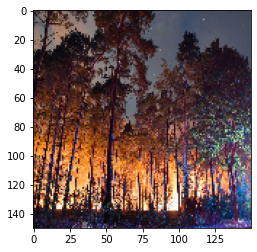

In [21]:
predictImage("/content/b2683a16be44f230a90f50bb944315e994b43042e43df798bb4feaf27e0f8bc8.jpg")

In [22]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.3 MB/s 


In [23]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=c2c6fa680d005a0be145bc807cf350d9d69e6a023daf72cb98e619d8667fcf92
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [24]:
#import opencv librariy
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#imort playsound package
from playsound import playsound

In [25]:
#load the saved model
model = load_model(r'forest2.h5')
#define video
video = cv2.VideoCapture('/content/Fighting Fire with Fire _ Explained in 30 Seconds.mp4')
#define the features
name = ['forest','with forest']

In [26]:
account_sid = 'ACd799efbbb20dd7f04c7212e051e8720c'
auth_token = '68f0332d56c9e386dd7ab82545597619'
client = Client(account_sid, auth_token)

message = client.messages \
    .create(
         body='Forest fire is detected , stay alert',
         from_='+17088347615',
         to='+919360116782'
     )

print(message.sid)

SMb7266c98355885fbc7a2ca2c4f30ca6c


In [27]:
#import opencv library
import cv2
#import numpy
import numpy as np
#import images and load_model function from keras
from keras_preprocessing import image
from keras.models import load_model
#import client from twilio API
from  twilio.rest import Client
#import playsound package
from playsound import playsound

#load the saved model
model = load_model(r'forest1.h5')
video = cv2.VideoCapture('/content/Fighting Fire with Fire _ Explained in 30 Seconds.mp4')
name = ['forest','with fire']